In [285]:
# import necessary modules
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import glob
import os

In [286]:
# import local .py scripts with function definitions/declarations
import importClean
import compare
import analyze

In [287]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 15,7.5
plt.rcParams['font.size'] = 20

## Import, clean, compare, and concat datasets

Below we will import the data that was collected/developed in this study. There are three main components of this data:
1. Descriptive transcriptions (the IPA transcripts of the recordings that participants sent in)
2. Prescriptive transcription (the IPA transcript of what pronunciation 'should' be in Spanish)
3. Survey results

All of this data will be imported. Dictionaries will store all of the data for each participant. The data stored in the dictionary of each participant will include raw data of the file path and the orginal transcript, dataframes summarizing their results when compared against the prescriptive set, and their survey results.

In [288]:
desc_transcript_files = glob.glob('transcriptions/descriptive/*.txt') # take in all desc filepaths
presc_transcript_file = glob.glob('transcriptions/prescriptive/*.txt') # take in presc transc file

In [289]:
presc_dictionary = imp_collect_clean(presc_transcript_file)
desc_dictionaries = imp_collect_clean(desc_transcript_files)

In [294]:
# iterate through all of the dictionaries and append respective DataFrames
# based on how their descriptive IPA transcription compares against the prescriptive
for index,dictionary in enumerate(desc_dictionaries):
    temp_desc_transcript = desc_dictionaries[index]["clean_transcript"]
    presc_transcript = presc_dictionary[0]["clean_transcript"]
    temp_df = string_list_phoneme_compare(temp_desc_transcript, presc_transcript)
    desc_dictionaries[index]['DF'] = temp_df

In [296]:
# example of what a completed comparrison DF looks like:

temp_dict = desc_dictionaries[0]
temp_dict['DF']

,word_number,prescriptive_pronunciation,student_pronunciation,syllable_number,prescriptive_syllable,student_syllable,correct_allophone,student_allophone
0,0,i-se,i-sei̯,0,i,i,i,i
1,0,i-se,i-sei̯,1,se,sei̯,e,ei̯
2,1,kom-bi-na-si̯on,kom-bi-na-si̯on,0,kom,kom,o,o
3,1,kom-bi-na-si̯on,kom-bi-na-si̯on,1,bi,bi,i,i
4,1,kom-bi-na-si̯on,kom-bi-na-si̯on,2,na,na,a,a
5,1,kom-bi-na-si̯on,kom-bi-na-si̯on,3,si̯on,si̯on,i̯o,i̯o
6,2,i-ni-si̯o,i-ni-si̯o,0,i,i,i,i
7,2,i-ni-si̯o,i-ni-si̯o,1,ni,ni,i,i
8,2,i-ni-si̯o,i-ni-si̯o,2,si̯o,si̯o,i̯o,i̯o
9,3,e-ðu-ka-si̯on,ɛ-du-ka-si̯on,0,e,ɛ,e,ɛ


In [268]:
survey_data = pd.read_csv("survey_data.csv") # import the data from the survey 
survey_data

,partic_number,age,self_identify,spanish_travel,travel_abroad,heritage_exposure,formal_instruct,years_formal_instruct,explicit_pronunciation,spanish_exposure,spanish_production,last_spanish,learn_spanish
0,partic10,20,Intermediate-Advanced,Yes,No,No,Yes,7.00,Yes,Sometimes,Sometimes,This month,Yes
1,partic04,21,Advanced,No,No,No,Yes,7.00,Yes,NaN,Rarely,This week,No
2,partic05,47,Beginner-Intermediate,Yes,No,No,No,0.00,No,Sometimes,Rarely,This week,Yes
3,partic02,28,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Sometimes,Almost never,It's been a long time,Yes
4,partic03,21,Beginner-Intermediate,Yes,No,No,Yes,3.00,Yes,Rarely,Sometimes,This week,No
5,partic06,27,Beginner,Yes,No,No,Yes,0.02,Yes,Sometimes,Almost never,It's been a long time,No
6,partic01,20,Beginner,Yes,No,No,Yes,2.00,Yes,Almost never,Almost never,It's been a long time,No
7,partic07,46,Intermediate,Yes,No,No,Yes,4.00,Yes,Rarely,Rarely,This year,No
8,partic08,19,Advanced,Yes,No,No,Yes,5.00,Yes,Rarely,Sometimes,This month,Yes
9,partic09,17,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Rarely,Rarely,This week,Yes


In [275]:
# combine the data from the spreadsheet with the data of the dictionary according to partic_number
# result is one large dictionary for each partic with file info, result spreadsheet data,
# and survey data.
survey_dicts = survey_data.to_dict('record') # turn each row into a respective dictionary
for dct_index,dct in enumerate(desc_dictionaries): 
    partic = dct['file_name']
    
    for new_dct_index,new_dct in enumerate(survey_dicts): # the double loop allows this to 
        # funciton even though the range does not match between the results and the survey
        # dictionaries (some participants never finished their participation)
        if new_dct["partic_number"] == partic:
            desc_dictionaries[dct_index] = {**desc_dictionaries[dct_index],
                                            **survey_dicts[new_dct_index]}

{'full_path': 'transcriptions/descriptive/partic07.txt',
 'file_name': 'partic07',
 'direct_path': 'transcriptions/descriptive/',
 'extention': '.txt',
 'import_index': 0,
 'clean_transcript': ['i-sei̯',
  'kom-bi-na-si̯on',
  'i-ni-si̯o',
  'ɛ-du-ka-si̯on',
  'as-ta',
  'o-ho',
  'ka-si',
  'u-saɾ',
  'funk-si̯o-naɾ',
  'kan-taɾ',
  'a-ju-dʌ',
  'om-bɾei̯',
  'ɛs-ta',
  'sa-βe',
  'o-poɻ-tu-ni-dad',
  'to-ke',
  'ɛl',
  'su',
  'eɾ-ma-na',
  'ɛs-ta',
  'ta-za',
  'ɪm-poɻ-tan-tei̯',
  'ke',
  'ɛl',
  'tan-to']}

In [135]:
index_numbers = [6,3,4,1,2,7,5,0] # bad practice of manual indexing; done due to time crunch for final paper
years_instruct = []

for i in range(len(index_numbers)): # create list of years of instruction with matching index to study_data for
    integer = index_numbers[i]
    years = survey_data['years_formal_instruct'][integer]
    years_instruct.append(years)

years_instruct

[2.0, 3.0, 3.0, 7.0, 0.0, 4.0, 0.02, 7.0]

In [136]:
spanish_product = []
for i in range(len(index_numbers)): # create list of years of instruction with matching index to study_data for
    integer = index_numbers[i]
    spanish_production = survey_data['spanish_production'][integer]
    spanish_product.append(spanish_production)
    
for i in range(len(spanish_product)):
    if spanish_product[i] == 'Almost never':
        spanish_product[i] = 0
    elif spanish_product[i] == 'Rarely':
        spanish_product[i] = 1
    elif spanish_product[i] == 'Sometimes':
        spanish_product[i] = 2

spanish_product

[0, 0, 2, 1, 1, 1, 0, 2]

In [137]:
years_instruct_mean = np.mean(years_instruct)
years_instruct_std = np.std(years_instruct)
print("In the sample, there was an average of " + str(years_instruct_mean) + 
      " years of formal instruction with a std of " + str(years_instruct_std))

In the sample, there was an average of 3.2525 years of formal instruction with a std of 2.534027180201507


In [138]:
dictionary = pd.read_csv("dictionary.csv") # import the dictionary for meta-data on specific words
dictionary.head(3)

,word,vowel_focus1,vowel_focus2,init_vowel,term_vowel,cognate,list_number
0,taza,a,NaN,0,1,0,20
1,sabe,e,a,0,1,0,13
2,casi,i,a,0,1,0,6


In [92]:
# some simple descriptive stats about the words in the current list
vowel_init = dictionary[dictionary['init_vowel'] == 1] # count vowel-initial words in df
vowel_init_count = len(vowel_init)
print("Words in set that are vowel initial: " + str(vowel_init_count))

term_vowel = dictionary[dictionary['term_vowel'] == 1]
term_vowel_count = len(term_vowel)
print("Words in set that are terminal vowel: " + str(term_vowel_count))

cognates = dictionary[dictionary['cognate'] == 1]
cognates_count = len(cognates)
print("Words in set that are cognates: " + str(cognates_count))

Words in set that are vowel initial: 15
Words in set that are terminal vowel: 17
Words in set that are cognates: 6


In [93]:
total_accuracy = get_proportions(study_data)
total_accuracy_mean = np.mean(total_accuracy)
total_accuracy_std = np.std(total_accuracy)
print("In total, the particpants scored an average of " + str(total_accuracy_mean) +
      " accuracy with std of: " + str(total_accuracy_std))

In total, the particpants scored an average of 0.7838983050847458 accuracy with std of: 0.111062223915942


In [104]:
non_cognate_dfs = filter_by_dictionary(dictionary, "cognate", 0, study_data)
non_cognate_accuracy = get_proportions(non_cognate_dfs)
non_cognate_accuracy
non_cognate_accuracy_mean = np.mean(non_cognate_accuracy)
non_cognate_accuracy_std = np.std(non_cognate_accuracy)
print("For non-cognates, the particpants scored an average of " + str(non_cognate_accuracy_mean) +
      " accuracy with std of: " + str(non_cognate_accuracy_std))

For non-cognates, the particpants scored an average of 0.7871621621621623 accuracy with std of: 0.07696476858036837


In [105]:
cognate_dfs = filter_by_dictionary(dictionary, "cognate", 1, study_data) # create a list of dfs that only accounts for the cognates in the study
cognate_accuracy = get_proportions(cognate_dfs)
cognate_accuracy
cognate_accuracy_mean = np.mean(cognate_accuracy)
cognate_accuracy_std = np.std(cognate_accuracy)
print("For cognates, the particpants scored an average of " + str(cognate_accuracy_mean) +
      " accuracy with std of: " + str(cognate_accuracy_std))

For cognates, the particpants scored an average of 0.7784090909090909 accuracy with std of: 0.1752175448307872


In [107]:
# check hypothesis that there is a difference between cognates and non-cognates
stat.ttest_ind(cognate_accuracy, non_cognate_accuracy, equal_var=False)

Ttest_indResult(statistic=-0.12101022504578406, pvalue=0.9061770558447754)

The t-test confirms that there *is not* enough evidence to support a statistically significant differenc of the average pronunciation accuarcy between cognates and non-cognaates in the sample.

## Linear Regression

Below a linear regression has been applied, for the dataset is so small that it doesn't really matter anyway because any regression we draw will be inconclusive due to the small data size. However, it is likely that a polynomial regression would be a stronger fit because pronunciation begins to plateu more and more as it reaches native ceiling. 

In [59]:
# vagabond matrix of years for linear regression
years_instruct_matrix = np.column_stack((np.ones(len(years_instruct)), years_instruct))

In [35]:
def model_coeffs(design_matrix, signal): # model the coefficients for the linear regression
    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse

accuracy_coeffs = model_coeffs(years_instruct_matrix, total_accuracy) # coefficients of accuracy as a function of years/formal lang instruct
accuracy_coeffs

array([0.75540131, 0.00876157])

In [36]:
# assign intercept (b) and slope (m) from previously returned array
accuracy_intercept = accuracy_coeffs[0]
accuracy_slope = accuracy_coeffs[1]

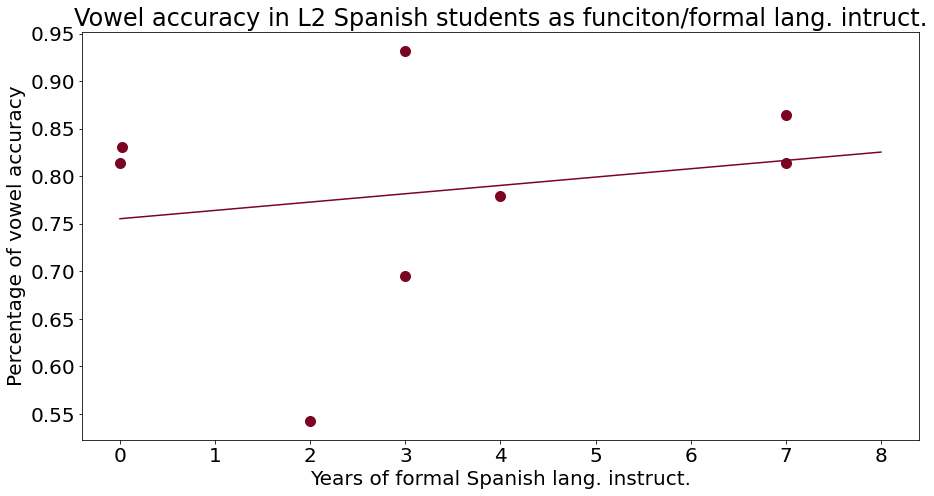

In [144]:
# define the linspace for the plot and the regression
plot_resolution = 1000
mn, mx = np.min(0), np.max(max(years_instruct) + 1)
years_instruct_lin = np.linspace(mn, mx, plot_resolution)

predicted_accuracy = accuracy_intercept + (years_instruct_lin*accuracy_slope)

plt.plot(years_instruct_lin, predicted_accuracy, c = "xkcd:wine red") # plot the regression--if you could even call it that--of the function
plt.scatter(years_instruct, total_accuracy, s= 100, c = "xkcd:wine red") # plot the individual data points

plt.xlabel('Years of formal Spanish lang. instruct.')
plt.ylabel('Percentage of vowel accuracy')
plt.title('Vowel accuracy in L2 Spanish students as funciton/formal lang. intruct.')

plt.savefig("vowel_accuracy_formal_lang_instruct.png")
plt.show()

Text(0.5, 1.0, 'visual check for heteroscedasticity')

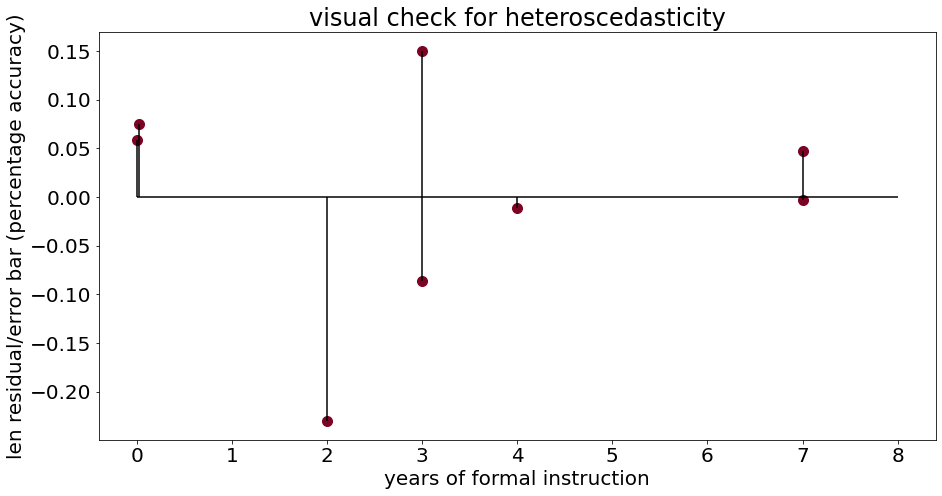

In [214]:
# Visual check for hederoskedasticity

# find out what the predicted values would be according to the coefficients previously determined
predicted_values = []
for i in range(len(years_instruct)):
    predicted_value = (accuracy_intercept + (years_instruct[i] * accuracy_slope))
    predicted_values.append(predicted_value)

# keep track of the residuals and such
heterosked = np.array([total_accuracy, predicted_values])
residual = heterosked[0] - heterosked[1]

# this is the linear fit if it was 'tilted' towards a y=0 axis
plt.hlines(0, 0, 8)

# scatter the residuals away from the regression
plt.scatter(years_instruct, residual,  color = "xkcd:wine red", s = 100)
plt.vlines(years_instruct, 0, residual)


plt.xlabel('years of formal instruction')
plt.ylabel('len residual/error bar (percentage accuracy)')
plt.title('visual check for heteroscedasticity')

### Linear regression? no
It's relatively clear that a linear regression is not the right fit. 

This is first depicted by the coefficients, which logically do not represent the aquisition of Spanish vowels by native english speakers (NES): most NESs who have received 0 years of formal Spanish education *do not* pronounce 75.6% of Spanish vowels correctly, and the growth is likely higher than 0.8% per year.

This is also depicted by the check for heteroskedasticity plot which--although is only representing a small sample--seems to represent a fit that grows quickly and then plateus, as opposed to a steady increase to ceiling.

In [181]:
vowel_aq_arr = np.array([years_instruct, total_accuracy])
vowel_aq_arr = vowel_aq_arr.reshape(8,2)
vowel_aq = pd.DataFrame(vowel_aq_arr)
vowel_aq

,0,1
0,2.000000,3.000000
1,3.000000,7.000000
2,0.000000,4.000000
3,0.020000,7.000000
4,0.542373,0.932203
5,0.694915,0.813559
6,0.813559,0.779661
7,0.830508,0.864407


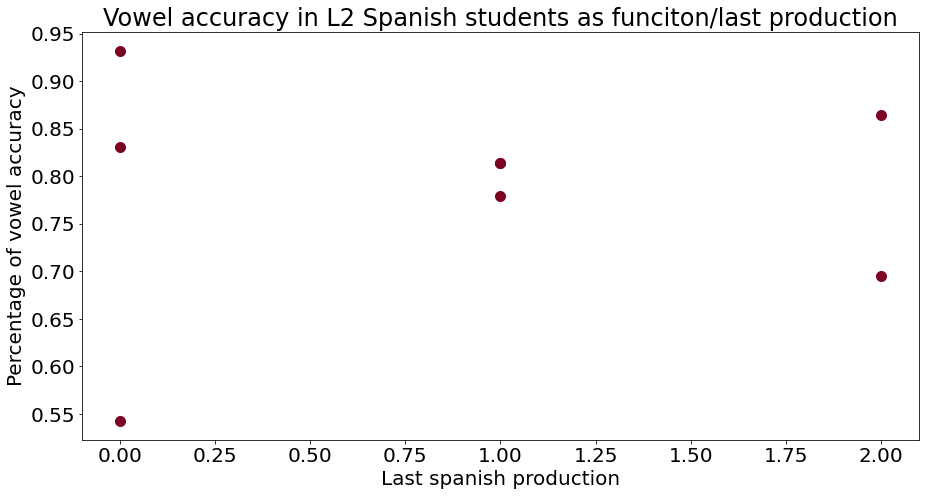

In [127]:
# This would require a much larger sample size (as most of this study would), but a chart like this would
# predict accuracy based on when the last time they produced Spansh was based on a 7-point Likert Scale

#plt.plot(years_instruct_lin, predicted_accuracy, c = "xkcd:wine red") # plot the regression--if you could even call it that--of the function
plt.scatter(spanish_product, total_accuracy, s= 100, c = "xkcd:wine red") # plot the individual data points

plt.xlabel('Last spanish production')
plt.ylabel('Percentage of vowel accuracy')
plt.title('Vowel accuracy in L2 Spanish students as funciton/last production')

plt.show()

In [224]:
allophone_e = descriptive_stats(study_data, 'e')

In this word list, the allophone [e] occured in 12 syllables.
For this allophone:
The particpants scored an average of 46.875% accuracy with standard deviation of: 10.15291077584267%

['ei̯', 'ɛ', 'ei̯', 'ɛ', 'i', 'ɛ', 'ei̯', 'ɛ']
['ɛ', 'ɛ', 'ɛ', 'ɛ']
['ɛ', 'ɛ', 'ɛ', 'ʌ', 'ɛ', 'ɛ']
['ɛ', 'ɛ', 'ei̯', 'ɛ', 'ei̯', 'ɛ']
['ei̯', 'ɛ', 'ɛ', 'ɛ', 'ɛ', 'ei̯']
['ei̯', 'ɛ', 'ɛ', 'ɛ', 'ei̯', 'ei̯', 'ɛ']
['ei̯', 'ɛ', 'ei̯', 'ɛ', 'ɛ', 'ɛ', 'ei̯', 'ɛ']
['ei̯', 'ɛ', 'ei̯', 'ɛ', 'ɛ', 'ei̯']


In [225]:
allophone_a = descriptive_stats(study_data, 'a')

In this word list, the allophone [a] occured in 21 syllables.
For this allophone:
The particpants scored an average of 87.5% accuracy with standard deviation of: 13.664571765772616%

['i', 'ei̯', 'a:', 'ʌ', 'a:', 'æ', 'a:', 'ə', 'ɛ']
[]
['ɪ', 'æ', 'ai̯', 'ə', 'ʌ']
[]
['ə', 'ə']
['a:', 'ai̯', 'a:']
['ʌ']
['a:']


In [226]:
allophone_i = descriptive_stats(study_data, 'i')

In this word list, the allophone [i] occured in 7 syllables.
For this allophone:
The particpants scored an average of 82.14285714285714% accuracy with standard deviation of: 19.884872724392938%

['ɪ', 'ɪ', 'ɪ']
[]
['ɪ', 'ɪ', 'ɪ']
['i:', 'ɪ', 'ɪ']
[]
[]
['ɪ']
[]


In [227]:
allophone_u = descriptive_stats(study_data,'u')

In this word list, the allophone [u] occured in 6 syllables.
For this allophone:
The particpants scored an average of 91.66666666666667% accuracy with standard deviation of: 11.785113019775793%

['uu̯']
[]
['ə']
['ə', 'uu̯']
[]
[]
[]
[]


In [228]:
allophone_o = descriptive_stats(study_data,'o')

In this word list, the allophone [o] occured in 9 syllables.
For this allophone:
The particpants scored an average of 87.5% accuracy with standard deviation of: 11.702985796078275%

['a', 'ə', 'ou̯']
[]
['a', 'a']
[]
['ə']
['a', 'ou̯']
[]
['ɚ']
